# Pr_6
1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [1]:
# data processing libs
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
# load data from drive
df = pd.read_csv("mines/Mine Dataset/Mine_Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [5]:
df.describe()

,V,H,S,M
count,338.000,338.000,338.000,338.000
mean,0.431,0.509,0.504,2.953
std,0.196,0.306,0.344,1.420
min,0.198,0.000,0.000,1.000
25%,0.310,0.273,0.200,2.000
50%,0.360,0.545,0.600,3.000
75%,0.483,0.727,0.800,4.000
max,1.000,1.000,1.000,5.000


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df['M'] = df['M'] - 1

## TODO:
1. Determine the problem -- classification
2. Determine the number of inputs -- 3 or 4 depending on if I use the Label for mine
3. Determine the number of layers
4. Determine the size of a layer
5. 

In [8]:
import tensorflow as tf

2023-11-11 15:09:53.127143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 15:09:53.154958: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 15:09:53.154991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 15:09:53.155022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 15:09:53.161438: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 15:09:53.162003: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [9]:
tf.keras.utils.set_random_seed(0)

In [10]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

### With labels

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, df['M'], test_size=0.25, random_state=0)

out = len(set(y_train.to_list()))

shape = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(shape,1)))
for i in range(1):
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(out))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
hist1 = model.fit(X_train,y_train, epochs=5000, batch_size=250)

Epoch 1/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.8008 - accuracy: 0.3320
Epoch 2/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7908 - accuracy: 0.3162
Epoch 3/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.7842 - accuracy: 0.2964
Epoch 4/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.7808 - accuracy: 0.3281
Epoch 5/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7765 - accuracy: 0.3597
Epoch 6/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.7665 - accuracy: 0.3557
Epoch 7/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7598 - accuracy: 0.3597
Epoch 8/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.7506 - accuracy: 0.3399
Epoch 9/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7452 - accuracy: 0.3399
Epoch 10/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.7401 - accuracy: 0.3241
Epoch 11/5000
2/2 [

In [13]:
predicted = np.argmax(model.predict(X_test),axis=1)

print(pd.DataFrame(predicted,columns = ['M']).value_counts())
print(y_test.value_counts())

3/3 [==============================] - 0s 1ms/step
M
1    25
0    17
2    16
4    15
3    12
Name: count, dtype: int64
M
1    25
0    17
2    16
3    15
4    12
Name: count, dtype: int64


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        16
           3       1.00      0.80      0.89        15
           4       0.80      1.00      0.89        12

    accuracy                           0.96        85
   macro avg       0.96      0.96      0.96        85
weighted avg       0.97      0.96      0.96        85

[[17  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 12  3]
 [ 0  0  0  0 12]]


In [16]:
tf.keras.backend.clear_session()

### Without labels

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['M']), df['M'], test_size=0.25, random_state=0)

out = len(set(y_train.to_list()))

shape = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(shape,1)))
for i in range(1):
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(out))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
hist2 = model.fit(X_train, y_train, epochs=5000, batch_size=250)

Epoch 1/5000
2/2 [==============================] - 0s 8ms/step - loss: 1.6758 - accuracy: 0.1858
Epoch 2/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.6716 - accuracy: 0.1818
Epoch 3/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6694 - accuracy: 0.2055
Epoch 4/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6685 - accuracy: 0.2055
Epoch 5/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.6699 - accuracy: 0.2055
Epoch 6/5000
2/2 [==============================] - 0s 4ms/step - loss: 1.6657 - accuracy: 0.2055
Epoch 7/5000
2/2 [==============================] - 0s 2ms/step - loss: 1.6637 - accuracy: 0.2055
Epoch 8/5000
2/2 [==============================] - 0s 6ms/step - loss: 1.6602 - accuracy: 0.2055
Epoch 9/5000
2/2 [==============================] - 0s 3ms/step - loss: 1.6561 - accuracy: 0.2095
Epoch 10/5000
2/2 [==============================] - 0s 5ms/step - loss: 1.6525 - accuracy: 0.2095
Epoch 11/5000
2/2 [

In [19]:
predicted = np.argmax(model.predict(X_test),axis=1)

print(pd.DataFrame(predicted,columns = ['M']).value_counts())
print(y_test.value_counts())

3/3 [==============================] - 0s 2ms/step
M
0    38
1    22
3    18
4     7
Name: count, dtype: int64
M
1    25
0    17
2    16
3    15
4    12
Name: count, dtype: int64


In [20]:
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.32      0.71      0.44        17
           1       0.91      0.80      0.85        25
           2       0.00      0.00      0.00        16
           3       0.33      0.40      0.36        15
           4       0.14      0.08      0.11        12

    accuracy                           0.46        85
   macro avg       0.34      0.40      0.35        85
weighted avg       0.41      0.46      0.42        85

[[12  0  0  5  0]
 [ 0 20  0  2  3]
 [ 8  2  0  4  2]
 [ 8  0  0  6  1]
 [10  0  0  1  1]]


/home/walltime/Venvs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/walltime/Venvs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/walltime/Venvs/sklearn-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Training Details

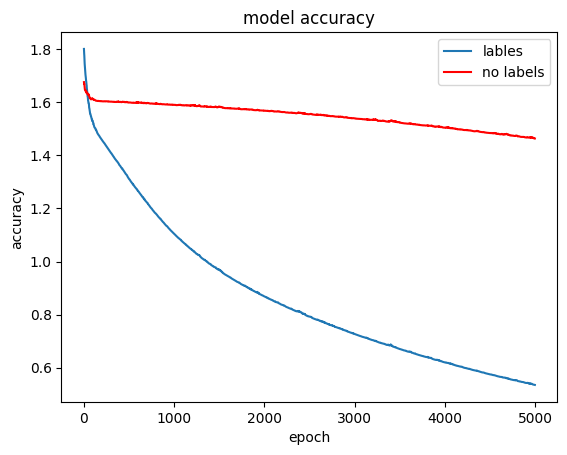

In [21]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'], color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['lables', 'no labels'], loc='upper right')
plt.show()